In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.multiclass import OneVsOneClassifier as OVO
from sklearn.multiclass import OneVsRestClassifier as OVA
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [ ]:
mnist = fetch_openml('mnist_784')
df = pd.DataFrame(mnist.data,columns=[i for i in range(0,784)])
df['Output'] = mnist.target.astype('int')
df_req = df[df['Output'] <= 4]

In [ ]:
x_train,x_non,y_train,y_non = train_test_split(df_req.iloc[:,:-1],df_req['Output'],test_size = 0.3)
x_val,x_test,y_val,y_test = train_test_split(x_non,y_non,test_size = 0.3334)

In [ ]:
knc_param = {'n_neighbors' : [2,3,4,5,6], 'weights' : ('uniform','distance')}
svc_param = {'kernel' : ('linear','poly','rbf'), 'C' : [0.8,1.0,1.2], 'tol' : [0.001,0.01,0.1,1.0]}
per_param = {'penalty' : ('l1','l2'), 'tol' : [0.001,0.01,0.1,1.0], 'class_weight' : (None,'balanced')}

In [ ]:
k = GSCV(KNC(), knc_param)
s = GSCV(SVC(), svc_param)
p = GSCV(Perceptron(), per_param)

In [ ]:
k.fit(x_val,y_val)
k.cv_results_

{'mean_fit_time': array([0.51865721, 0.51489024, 0.52018704, 0.52030993, 0.51812549,
        0.51557856, 0.51672997, 0.51544809, 0.5176722 , 0.52310591]),
 'mean_score_time': array([9.82202554, 9.75924973, 9.82183709, 9.79370642, 9.79930077,
        9.74623756, 9.81883216, 9.7739378 , 9.82902145, 9.86888862]),
 'mean_test_score': array([0.97970814, 0.9841866 , 0.98334666, 0.98418641, 0.98138744,
        0.98460638, 0.98152721, 0.98180712, 0.97830905, 0.98166756]),
 'param_n_neighbors': masked_array(data=[2, 2, 3, 3, 4, 4, 5, 5, 6, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False, False, False,
                    False, 

In [ ]:
s.fit(x_val,y_val)
s.cv_results_

{'mean_fit_time': array([3.2629509 , 3.26171522, 3.16371503, 2.74351153, 6.37073417,
        6.31734824, 5.9759244 , 4.53307204, 5.86601577, 5.80298314,
        5.18995934, 3.10870743, 3.16956215, 3.16227083, 3.12313671,
        2.72573843, 6.04115028, 6.01486616, 5.72981219, 4.13854775,
        5.61378508, 5.53543   , 4.98650751, 2.85094662, 3.15972123,
        3.16461496, 3.06558652, 2.69774389, 5.76231871, 5.71866226,
        5.38383594, 3.91654191, 5.5765718 , 5.49646287, 4.94743629,
        2.73435559]),
 'mean_score_time': array([0.84926429, 0.85688291, 0.86607728, 0.87007952, 1.24573364,
        1.2293221 , 1.19067841, 0.93464203, 1.54102426, 1.51980791,
        1.38167448, 0.92581067, 0.84044437, 0.84586387, 0.86186233,
        0.87133441, 1.17946706, 1.18021808, 1.13712173, 0.86916976,
        1.47662921, 1.4631927 , 1.36310616, 0.86381955, 0.84237547,
        0.84228206, 0.85875583, 0.86684155, 1.12756376, 1.13716908,
        1.08006315, 0.82898054, 1.45996084, 1.44071021, 1.

In [ ]:
p.fit(x_val,y_val)
p.cv_results_

{'mean_fit_time': array([2.4127182 , 2.4520153 , 2.45642219, 2.42720461, 0.41629419,
        0.42081161, 0.42192407, 0.42401228, 2.25936313, 2.28508081,
        2.2806644 , 2.27413564, 0.39603395, 0.40024424, 0.39724083,
        0.39551535]),
 'mean_score_time': array([0.00736713, 0.00607939, 0.00583062, 0.00559592, 0.00558753,
        0.00527916, 0.0055675 , 0.00612211, 0.00601406, 0.00644827,
        0.00689054, 0.00613742, 0.00551615, 0.00655098, 0.00584989,
        0.00588813]),
 'mean_test_score': array([0.95493988, 0.95493988, 0.95493988, 0.95493988, 0.94262475,
        0.94262475, 0.94262475, 0.94262475, 0.95368036, 0.95368036,
        0.95368036, 0.95368036, 0.94542548, 0.94542548, 0.94542548,
        0.94542548]),
 'param_class_weight': masked_array(data=[None, None, None, None, None, None, None, None,
                    'balanced', 'balanced', 'balanced', 'balanced',
                    'balanced', 'balanced', 'balanced', 'balanced'],
              mask=[False, False, False,

In [ ]:
df_s = pd.DataFrame((StandardScaler().fit(pd.DataFrame(mnist.data,columns=[i for i in range(0,784)]))).transform(pd.DataFrame(mnist.data,columns=[i for i in range(0,784)])))
df_m = pd.DataFrame((MinMaxScaler().fit(pd.DataFrame(mnist.data,columns=[i for i in range(0,784)]))).transform(pd.DataFrame(mnist.data,columns=[i for i in range(0,784)])))
df_s['Output'] = mnist.target.astype('int')
df_m['Output'] = mnist.target.astype('int')
df_seq = df[df['Output'] <= 4]
df_meq = df[df['Output'] <= 4]

In [ ]:
sx_train,sx_non,sy_train,sy_non = train_test_split(df_seq.iloc[:,:-1],df_seq['Output'],test_size = 0.3)
sx_val,sx_test,sy_val,sy_test = train_test_split(sx_non,sy_non,test_size = 0.3334)

mx_train,mx_non,my_train,my_non = train_test_split(df_meq.iloc[:,:-1],df_meq['Output'],test_size = 0.3)
mx_val,mx_test,my_val,my_test = train_test_split(mx_non,my_non,test_size = 0.3334)

In [ ]:
ks = GSCV(KNC(), knc_param)
km = GSCV(KNC(), knc_param)
sm = GSCV(SVC(), svc_param)
ss = GSCV(SVC(), svc_param)
ps = GSCV(Perceptron(), per_param)
pm = GSCV(Perceptron(), per_param)

In [ ]:
ks.fit(sx_val,sy_val)
ks.cv_results_

{'mean_fit_time': array([0.43019209, 0.42856832, 0.42652407, 0.42425208, 0.42732677,
        0.42935324, 0.42445416, 0.42609134, 0.42742271, 0.42477298]),
 'mean_score_time': array([9.59049602, 9.61742554, 9.59464436, 9.5726294 , 9.56257129,
        9.55802984, 9.60213609, 9.521766  , 9.62543592, 9.52690501]),
 'mean_test_score': array([0.97621047, 0.98390688, 0.9801286 , 0.98096816, 0.97677   ,
        0.98166795, 0.97830925, 0.97942891, 0.9757902 , 0.97970873]),
 'param_n_neighbors': masked_array(data=[2, 2, 3, 3, 4, 4, 5, 5, 6, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False, False, False,
                    False, 

In [ ]:
km.fit(mx_val,my_val)
km.cv_results_

{'mean_fit_time': array([0.45381851, 0.45359254, 0.45597024, 0.45224404, 0.46207466,
        0.45800238, 0.45535588, 0.45917873, 0.45508041, 0.46098118]),
 'mean_score_time': array([9.7474596 , 9.78310633, 9.78864088, 9.70555401, 9.88072071,
        9.76612167, 9.78463016, 9.79059076, 9.79104314, 9.87170277]),
 'mean_test_score': array([0.9791489 , 0.98586581, 0.98292767, 0.98306753, 0.98068853,
        0.98446681, 0.98152809, 0.98264765, 0.97956867, 0.98222778]),
 'param_n_neighbors': masked_array(data=[2, 2, 3, 3, 4, 4, 5, 5, 6, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False, False, False,
                    False, 

In [ ]:
ss.fit(sx_val,sy_val)
ss.cv_results_

{'mean_fit_time': array([3.70791187, 3.68779411, 3.53264246, 3.16421571, 6.97735391,
        6.85623178, 6.48784103, 4.93721061, 6.31952329, 6.29809556,
        5.79196591, 3.45772438, 3.66705947, 3.62601657, 3.52970939,
        3.10879598, 6.47359457, 6.41858912, 6.12469282, 4.57548003,
        6.11084924, 5.97945628, 5.41482038, 3.15687299, 3.6258491 ,
        3.60357409, 3.50935102, 3.09814739, 6.17287817, 6.14208655,
        5.85459318, 4.26142969, 5.95623636, 5.86548934, 5.25818305,
        2.96253624]),
 'mean_score_time': array([0.96459441, 0.95886765, 0.97024221, 0.99799309, 1.35855403,
        1.33290854, 1.25879126, 0.98117027, 1.63992786, 1.64050531,
        1.50884495, 0.97957916, 0.95245619, 0.9573432 , 0.9633009 ,
        0.98196154, 1.2426939 , 1.24030151, 1.19467936, 0.92829485,
        1.57806163, 1.5638454 , 1.42266526, 0.91503234, 0.94200363,
        0.94573617, 0.95999165, 0.98213425, 1.19392829, 1.2023634 ,
        1.13796334, 0.87332101, 1.54935117, 1.52425508, 1.

In [ ]:
sm.fit(mx_val,my_val)
sm.cv_results_

{'mean_fit_time': array([3.20387712, 3.1863564 , 3.11818938, 2.6957036 , 6.74691305,
        6.72875681, 6.21174202, 4.64320941, 6.19409375, 6.09981985,
        5.48181667, 3.24248915, 3.21744757, 3.20251417, 3.10794687,
        2.68127189, 6.20330215, 6.16207294, 5.8252573 , 4.21625609,
        5.78798661, 5.72989674, 5.13740854, 2.92005816, 3.12443352,
        3.0812017 , 3.0249208 , 2.58380909, 5.7875772 , 5.76403646,
        5.48289514, 3.89596262, 5.67154675, 5.59329333, 5.03621364,
        2.73209996]),
 'mean_score_time': array([0.84517517, 0.84968748, 0.85862327, 0.84857516, 1.30424571,
        1.29557519, 1.21391497, 0.93041806, 1.61428752, 1.61234093,
        1.4448091 , 0.93283863, 0.85121222, 0.86063695, 0.860499  ,
        0.84890337, 1.20463939, 1.19554586, 1.15586338, 0.87490053,
        1.54407978, 1.52397184, 1.39211411, 0.88449287, 0.84634166,
        0.85421309, 0.86317968, 0.84683123, 1.16159739, 1.1639544 ,
        1.10472522, 0.82970648, 1.51926594, 1.50622144, 1.

In [ ]:
ps.fit(sx_val,sy_val)
ps.cv_results_

{'mean_fit_time': array([2.17643194, 2.17348037, 2.15406342, 2.15396218, 0.42056575,
        0.42297039, 0.4184484 , 0.41855497, 2.42085538, 2.41833391,
        2.42286549, 2.41202807, 0.41997108, 0.41386218, 0.41611056,
        0.40717225]),
 'mean_score_time': array([0.00767717, 0.00637841, 0.0078248 , 0.00675426, 0.00742855,
        0.00710735, 0.00664105, 0.00658503, 0.00714259, 0.00651622,
        0.00634255, 0.00688915, 0.00636621, 0.00662384, 0.00661421,
        0.00617499]),
 'mean_test_score': array([0.95004164, 0.95004164, 0.95004164, 0.95004164, 0.93982569,
        0.93982569, 0.93982569, 0.93982569, 0.94514351, 0.94514351,
        0.94514351, 0.94514351, 0.93115005, 0.93115005, 0.93115005,
        0.93115005]),
 'param_class_weight': masked_array(data=[None, None, None, None, None, None, None, None,
                    'balanced', 'balanced', 'balanced', 'balanced',
                    'balanced', 'balanced', 'balanced', 'balanced'],
              mask=[False, False, False,

In [ ]:
pm.fit(mx_val,my_val)
pm.cv_results_

{'mean_fit_time': array([2.27810559, 2.2614428 , 2.30231342, 2.27532201, 0.41354403,
        0.41980639, 0.41479878, 0.4153585 , 2.4586524 , 2.45759416,
        2.46186299, 2.45421748, 0.40951281, 0.41101956, 0.4132545 ,
        0.41346784]),
 'mean_score_time': array([0.00688248, 0.00643096, 0.00625119, 0.00627837, 0.00647936,
        0.0074708 , 0.00677915, 0.00582757, 0.00603995, 0.0069643 ,
        0.00711374, 0.00690608, 0.00643754, 0.00647593, 0.00706325,
        0.0069355 ]),
 'mean_test_score': array([0.95801817, 0.95801817, 0.95801817, 0.95801817, 0.93786637,
        0.93786637, 0.93786637, 0.93786637, 0.95647913, 0.95647913,
        0.95647913, 0.95647913, 0.93828644, 0.93828644, 0.93828644,
        0.93828644]),
 'param_class_weight': masked_array(data=[None, None, None, None, None, None, None, None,
                    'balanced', 'balanced', 'balanced', 'balanced',
                    'balanced', 'balanced', 'balanced', 'balanced'],
              mask=[False, False, False,

In [ ]:
kno = k.best_estimator_
kns = ks.best_estimator_
knm = km.best_estimator_

svo = s.best_estimator_
svs = ss.best_estimator_
smv = sm.best_estimator_

peo = p.best_estimator_
pes = ps.best_estimator_
pem = pm.best_estimator_

In [ ]:
ovo = []
ova = []
for j in [kno,kns,knm,svo,svs,smv,peo,pes,pem] :
  ovo.append(OVO(j))
  ova.append(OVA(j))

In [ ]:
ko_test = (ovo[0].fit(x_train,y_train)).score(x_test,y_test)
ks_test = (ovo[1].fit(sx_train,sy_train)).score(sx_test,sy_test)
km_test = (ovo[2].fit(mx_train,my_train)).score(mx_test,my_test)

so_test = (ovo[3].fit(x_train,y_train)).score(x_test,y_test)
ss_test = (ovo[4].fit(sx_train,sy_train)).score(sx_test,sy_test)
sm_test = (ovo[5].fit(mx_train,my_train)).score(mx_test,my_test)

po_test = (ovo[6].fit(x_train,y_train)).score(x_test,y_test)
ps_test = (ovo[7].fit(sx_train,sy_train)).score(sx_test,sy_test)
pm_test = (ovo[8].fit(mx_train,my_train)).score(mx_test,my_test)

In [ ]:
ko_testa = (ova[0].fit(x_train,y_train)).score(x_test,y_test)
ks_testa = (ova[1].fit(sx_train,sy_train)).score(sx_test,sy_test)
km_testa = (ova[2].fit(mx_train,my_train)).score(mx_test,my_test)

so_testa = (ova[3].fit(x_train,y_train)).score(x_test,y_test)
ss_testa = (ova[4].fit(sx_train,sy_train)).score(sx_test,sy_test)
sm_testa = (ova[5].fit(mx_train,my_train)).score(mx_test,my_test)

po_testa = (ova[6].fit(x_train,y_train)).score(x_test,y_test)
ps_testa = (ova[7].fit(sx_train,sy_train)).score(sx_test,sy_test)
pm_testa = (ova[8].fit(mx_train,my_train)).score(mx_test,my_test)

In [ ]:
print("Accuracy of Nearest Neighbor Classifier with OVO Configuration and Original Dataset = " + str(ko_test*100)+" %")
print("Accuracy of Nearest Neighbor Classifier with OVO Configuration and Standardized Dataset = " + str(ks_test*100)+" %")
print("Accuracy of Nearest Neighbor Classifier with OVO Configuration and MinMaximised Dataset = " + str(km_test*100)+" %")

Accuracy of Nearest Neighbor Classifier with OVO Configuration and Original Dataset = 99.07692307692308 %
Accuracy of Nearest Neighbor Classifier with OVO Configuration and Standardized Dataset = 99.3006993006993 %
Accuracy of Nearest Neighbor Classifier with OVO Configuration and MinMaximised Dataset = 99.04895104895105 %


In [ ]:
print("Accuracy of Nearest Neighbor Classifier with OVA Configuration and Original Dataset = " + str(ko_testa*100)+" %")
print("Accuracy of Nearest Neighbor Classifier with OVA Configuration and Standardized Dataset = " + str(ks_testa*100)+" %")
print("Accuracy of Nearest Neighbor Classifier with OVA Configuration and MinMaximised Dataset = " + str(km_testa*100)+" %")

Accuracy of Nearest Neighbor Classifier with OVA Configuration and Original Dataset = 99.04895104895105 %
Accuracy of Nearest Neighbor Classifier with OVA Configuration and Standardized Dataset = 99.3006993006993 %
Accuracy of Nearest Neighbor Classifier with OVA Configuration and MinMaximised Dataset = 99.04895104895105 %


In [ ]:
print("Accuracy of Support Vector Classifier with OVO Configuration and Original Dataset = " + str(so_test*100)+" %")
print("Accuracy of Support Vector Classifier with OVO Configuration and Standardized Dataset = " + str(ss_test*100)+" %")
print("Accuracy of Support Vector Classifier with OVO Configuration and MinMaximised Dataset = " + str(sm_test*100)+" %")

Accuracy of Support Vector Classifier with OVO Configuration and Original Dataset = 99.32867132867132 %
Accuracy of Support Vector Classifier with OVO Configuration and Standardized Dataset = 99.18881118881119 %
Accuracy of Support Vector Classifier with OVO Configuration and MinMaximised Dataset = 98.99300699300699 %


In [ ]:
print("Accuracy of Support Vector Classifier with OVA Configuration and Original Dataset = " + str(so_testa*100)+" %")
print("Accuracy of Support Vector Classifier with OVA Configuration and Standardized Dataset = " + str(ss_testa*100)+" %")
print("Accuracy of Support Vector Classifier with OVA Configuration and MinMaximised Dataset = " + str(sm_testa*100)+" %")

Accuracy of Support Vector Classifier with OVA Configuration and Original Dataset = 99.24475524475524 %
Accuracy of Support Vector Classifier with OVA Configuration and Standardized Dataset = 99.18881118881119 %
Accuracy of Support Vector Classifier with OVA Configuration and MinMaximised Dataset = 99.04895104895105 %


In [ ]:
print("Accuracy of Perceptron Classifier with OVO Configuration and Original Dataset = " + str(po_test*100)+" %")
print("Accuracy of Perceptron Classifier with OVO Configuration and Standardized Dataset = " + str(ps_test*100)+" %")
print("Accuracy of Perceptron Classifier with OVO Configuration and MinMaximised Dataset = " + str(pm_test*100)+" %")

Accuracy of Perceptron Classifier with OVO Configuration and Original Dataset = 96.05594405594405 %
Accuracy of Perceptron Classifier with OVO Configuration and Standardized Dataset = 96.81118881118881 %
Accuracy of Perceptron Classifier with OVO Configuration and MinMaximised Dataset = 96.41958041958041 %


In [ ]:
print("Accuracy of Perceptron Classifier with OVA Configuration and Original Dataset = " + str(po_testa*100)+" %")
print("Accuracy of Perceptron Classifier with OVA Configuration and Standardized Dataset = " + str(ps_testa*100)+" %")
print("Accuracy of Perceptron Classifier with OVA Configuration and MinMaximised Dataset = " + str(pm_testa*100)+" %")

Accuracy of Perceptron Classifier with OVA Configuration and Original Dataset = 94.20979020979021 %
Accuracy of Perceptron Classifier with OVA Configuration and Standardized Dataset = 95.13286713286713 %
Accuracy of Perceptron Classifier with OVA Configuration and MinMaximised Dataset = 95.8881118881119 %


# **Support Vector Machine with "Diabetes Dataset"**

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df_s = pd.DataFrame((StandardScaler().fit(df.iloc[:,:-1])).transform(df.iloc[:,:-1]),columns = df.iloc[:,:-1].columns)
df_m = pd.DataFrame((MinMaxScaler().fit(df.iloc[:,:-1])).transform(df.iloc[:,:-1]),columns = df.iloc[:,:-1].columns)

df_s['Outcome'] = df['Outcome']
df_m['Outcome'] = df['Outcome']

In [4]:
tr_x,te_x,tr_y,te_y = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size = 0.3)
val_x,test_x,val_y,test_y = train_test_split(te_x,te_y,test_size = 0.3334)

tr_xs,te_xs,tr_ys,te_ys = train_test_split(df_s.iloc[:,:-1],df_s.iloc[:,-1],test_size = 0.3)
val_xs,test_xs,val_ys,test_ys = train_test_split(te_xs,te_ys,test_size = 0.3334)

tr_xm,te_xm,tr_ym,te_ym = train_test_split(df_m.iloc[:,:-1],df_m.iloc[:,-1],test_size = 0.3)
val_xm,test_xm,val_ym,test_ym = train_test_split(te_xm,te_ym,test_size = 0.3334)

In [5]:
params = {'C' : [0.001,0.01,0.1,1,10,100,1000], 'tol' : [0.01,0.1,1,10,100]}
poly_params = {'C' : [0.001,0.01,0.1,1,10,100,1000], 'degree' : [2,3,4,5,6]}
Gs1 = GSCV(SVC(kernel='linear'),params)
Gs2 = GSCV(SVC(kernel='poly'),poly_params)
Gs3 = GSCV(SVC(kernel='rbf'),params)
Gs1.fit(val_x,val_y)
Gs2.fit(val_x,val_y)
Gs3.fit(val_x,val_y)

Gs1s = GSCV(SVC(kernel='linear'),params)
Gs2s = GSCV(SVC(kernel='poly'),poly_params)
Gs3s = GSCV(SVC(kernel='rbf'),params)
Gs1s.fit(val_xs,val_ys)
Gs2s.fit(val_xs,val_ys)
Gs3s.fit(val_xs,val_ys)

Gs1m = GSCV(SVC(kernel='linear'),params)
Gs2m = GSCV(SVC(kernel='poly'),poly_params)
Gs3m = GSCV(SVC(kernel='rbf'),params)
Gs1m.fit(val_xm,val_ym)
Gs2m.fit(val_xm,val_ym)
Gs3m.fit(val_xm,val_ym)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'tol': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [6]:
Gs1.cv_results_

{'mean_fit_time': array([2.36077309e-03, 2.02989578e-03, 1.82662010e-03, 1.49412155e-03,
        1.54347420e-03, 4.16717529e-03, 3.21960449e-03, 2.22578049e-03,
        1.47423744e-03, 1.49617195e-03, 2.17072487e-02, 1.25823021e-02,
        5.20420074e-03, 1.56450272e-03, 1.49898529e-03, 3.94437456e-01,
        1.32055283e-01, 3.41049194e-02, 1.55129433e-03, 1.52134895e-03,
        3.07252731e+00, 1.24966569e+00, 2.69884205e-01, 1.68418884e-03,
        1.65858269e-03, 1.18467826e+01, 5.83325219e+00, 2.74531670e+00,
        1.53121948e-03, 2.03270912e-03, 2.77507084e+01, 1.55792075e+01,
        8.91373959e+00, 1.50580406e-03, 1.44882202e-03]),
 'mean_score_time': array([0.00105929, 0.00097532, 0.00092573, 0.0008924 , 0.00087385,
        0.00095015, 0.00092192, 0.00090394, 0.00088902, 0.00086904,
        0.0011622 , 0.00097508, 0.0009232 , 0.00092778, 0.00088062,
        0.00147781, 0.00146084, 0.00127606, 0.00099349, 0.00089731,
        0.00130262, 0.00131645, 0.00136657, 0.00092797, 0.

In [7]:
Gs2.cv_results_

{'mean_fit_time': array([0.0018507 , 0.00177298, 0.00177097, 0.0018971 , 0.0018734 ,
        0.00175834, 0.00179176, 0.00190506, 0.00204597, 0.00199308,
        0.00173011, 0.00192671, 0.00228224, 0.00239363, 0.00244646,
        0.00187974, 0.00238247, 0.0030056 , 0.00388403, 0.00585985,
        0.00276279, 0.005161  , 0.00667233, 0.02052369, 0.019278  ,
        0.01224976, 0.01343961, 0.02870817, 0.10040493, 0.06479487,
        0.04515581, 0.09224443, 0.16623406, 0.1513062 , 0.1963717 ]),
 'mean_score_time': array([0.0009376 , 0.0009037 , 0.00091076, 0.00098324, 0.00091352,
        0.00090537, 0.00091844, 0.00090723, 0.00089722, 0.00089908,
        0.0008986 , 0.00092201, 0.00090227, 0.0009078 , 0.000949  ,
        0.00088973, 0.00094299, 0.00090246, 0.00093598, 0.0009263 ,
        0.00092716, 0.00094199, 0.00094528, 0.00113072, 0.00119982,
        0.00098958, 0.00100284, 0.00117068, 0.00120568, 0.00125489,
        0.00130148, 0.00126629, 0.00130839, 0.00143409, 0.00127192]),
 'mean_t

In [8]:
Gs3.cv_results_

{'mean_fit_time': array([0.00193338, 0.00188785, 0.00197654, 0.00146284, 0.00144691,
        0.00190644, 0.00189772, 0.00192804, 0.00143709, 0.00145097,
        0.0019012 , 0.00189257, 0.00192022, 0.00156498, 0.00144958,
        0.00193291, 0.00186434, 0.00184002, 0.00144382, 0.00145502,
        0.00200977, 0.00188799, 0.00185332, 0.00146122, 0.00147486,
        0.00254259, 0.00229712, 0.00202212, 0.00151067, 0.00141125,
        0.00365677, 0.00422535, 0.00287857, 0.00145516, 0.00181413]),
 'mean_score_time': array([0.00095105, 0.00094132, 0.0009315 , 0.00086684, 0.00084085,
        0.00097518, 0.0009685 , 0.00096231, 0.00085826, 0.00091939,
        0.00095592, 0.00094156, 0.00094943, 0.00086198, 0.00086379,
        0.0009593 , 0.00092697, 0.00093641, 0.0008491 , 0.00084329,
        0.00095301, 0.00095563, 0.00096312, 0.00086284, 0.00091825,
        0.00097389, 0.00098677, 0.00100756, 0.00084662, 0.0008513 ,
        0.00092115, 0.00126214, 0.00094004, 0.00085945, 0.00106249]),
 'mean_t

In [9]:
Gs1s.cv_results_

{'mean_fit_time': array([0.00154085, 0.00150332, 0.00153852, 0.00143332, 0.00127649,
        0.00147538, 0.00148387, 0.00145988, 0.00130444, 0.00127954,
        0.00151725, 0.00153012, 0.00174575, 0.00127745, 0.00129189,
        0.00174675, 0.00171824, 0.0018743 , 0.00149093, 0.00134397,
        0.00363746, 0.00305338, 0.00265446, 0.00127602, 0.00127606,
        0.02020164, 0.01382194, 0.0107594 , 0.00132275, 0.0013062 ,
        0.19487939, 0.11491537, 0.08268895, 0.00133629, 0.00129271]),
 'mean_score_time': array([0.00083327, 0.00087838, 0.00084672, 0.00082207, 0.000775  ,
        0.00081863, 0.00082278, 0.00084071, 0.00075641, 0.00077553,
        0.00080752, 0.0008244 , 0.0008812 , 0.00077291, 0.00077701,
        0.00082374, 0.00082426, 0.00085402, 0.00083618, 0.00088964,
        0.00089226, 0.00082421, 0.00087514, 0.00079474, 0.00078344,
        0.00096922, 0.00103364, 0.00095134, 0.00078235, 0.00077372,
        0.00122085, 0.00121789, 0.00123687, 0.00079346, 0.00077538]),
 'mean_t

In [10]:
Gs2s.cv_results_

{'mean_fit_time': array([0.00158968, 0.00156288, 0.00160208, 0.00159783, 0.00162306,
        0.00163188, 0.00156913, 0.00168877, 0.00210934, 0.00174384,
        0.00163674, 0.00166945, 0.00171218, 0.00170851, 0.00169082,
        0.00165138, 0.00172029, 0.00173512, 0.00171795, 0.00178967,
        0.00461516, 0.00205002, 0.0019104 , 0.00203252, 0.00195208,
        0.00975561, 0.00311131, 0.00212975, 0.00214748, 0.0022192 ,
        0.18607821, 0.00384655, 0.00268121, 0.00229812, 0.00198164]),
 'mean_score_time': array([0.00086441, 0.00082645, 0.00083814, 0.0008172 , 0.00084119,
        0.00084295, 0.00083065, 0.00082707, 0.00108633, 0.00083947,
        0.00085301, 0.00088305, 0.00084786, 0.00082312, 0.00086298,
        0.0008327 , 0.00083361, 0.00083013, 0.00082202, 0.00083427,
        0.00103531, 0.00085864, 0.00081458, 0.00084367, 0.00085053,
        0.00089502, 0.00091667, 0.00083447, 0.00086136, 0.00103331,
        0.00128608, 0.00113173, 0.0010797 , 0.00083604, 0.00091386]),
 'mean_t

In [11]:
Gs3s.cv_results_

{'mean_fit_time': array([0.00176291, 0.00167794, 0.00188117, 0.00130119, 0.00137243,
        0.00169878, 0.00174437, 0.00178051, 0.00135226, 0.00130863,
        0.0022974 , 0.00172958, 0.00171041, 0.0012886 , 0.00126529,
        0.0017415 , 0.00172944, 0.00164957, 0.00125961, 0.00138798,
        0.00202141, 0.00188422, 0.00173354, 0.00129924, 0.00130239,
        0.00223269, 0.0020288 , 0.00188785, 0.0013062 , 0.00129724,
        0.00226331, 0.00209689, 0.00176067, 0.00129695, 0.0013062 ]),
 'mean_score_time': array([0.00086808, 0.0008534 , 0.00089221, 0.00079627, 0.00081034,
        0.00087638, 0.00086646, 0.0008822 , 0.00079784, 0.00078535,
        0.00103869, 0.00089374, 0.00085096, 0.00076747, 0.00077481,
        0.00086498, 0.0008956 , 0.0008584 , 0.00077839, 0.0007844 ,
        0.00086961, 0.00088401, 0.00085497, 0.00076361, 0.00077372,
        0.00086083, 0.00086746, 0.00086756, 0.00078392, 0.00081344,
        0.00086021, 0.00087042, 0.00089116, 0.00077863, 0.00077271]),
 'mean_t

In [12]:
Gs1m.cv_results_

{'mean_fit_time': array([0.00144539, 0.00150566, 0.00144649, 0.00130339, 0.00128007,
        0.00216751, 0.00174289, 0.00160537, 0.00147901, 0.00142856,
        0.00157599, 0.00153565, 0.0014822 , 0.00147882, 0.00129323,
        0.00144763, 0.00145988, 0.0014256 , 0.00127087, 0.00153904,
        0.00200682, 0.00150924, 0.0014677 , 0.00130081, 0.00128303,
        0.00200005, 0.00188012, 0.00167942, 0.00126162, 0.00138998,
        0.00660267, 0.00456047, 0.00353508, 0.00139351, 0.00135465]),
 'mean_score_time': array([0.00081272, 0.00082674, 0.00079737, 0.00081639, 0.00077515,
        0.00114341, 0.0009584 , 0.00090284, 0.0008677 , 0.00086155,
        0.00086274, 0.00086074, 0.0008513 , 0.00078735, 0.00076661,
        0.00079846, 0.00079589, 0.00081716, 0.0007865 , 0.00086751,
        0.00100474, 0.0007998 , 0.00080194, 0.00077772, 0.00077386,
        0.00080385, 0.00084138, 0.00084686, 0.0007617 , 0.0008359 ,
        0.00112548, 0.00081835, 0.00087619, 0.00093756, 0.00082517]),
 'mean_t

In [13]:
Gs2m.cv_results_

{'mean_fit_time': array([0.00159292, 0.00156736, 0.00156527, 0.00158801, 0.00166488,
        0.00156012, 0.00158372, 0.00167818, 0.0017818 , 0.00191698,
        0.0016046 , 0.00160937, 0.00184317, 0.00258117, 0.00305748,
        0.00167203, 0.00210938, 0.00310163, 0.00398021, 0.00465984,
        0.00252895, 0.00676403, 0.00644164, 0.01138625, 0.01327744,
        0.00892611, 0.011097  , 0.02427182, 0.0192461 , 0.02517939,
        0.04762826, 0.05687032, 0.03277192, 0.02856822, 0.02573948]),
 'mean_score_time': array([0.00085435, 0.00087495, 0.00085812, 0.00083294, 0.00085988,
        0.00083733, 0.00086021, 0.00085783, 0.00086656, 0.00084929,
        0.00083361, 0.00083127, 0.00082698, 0.00081701, 0.00082436,
        0.00083728, 0.00082884, 0.00083251, 0.00083852, 0.00084596,
        0.00084453, 0.00088305, 0.00090866, 0.00107069, 0.0009378 ,
        0.00087867, 0.00093064, 0.00106254, 0.00100737, 0.00104818,
        0.00109925, 0.00113282, 0.00109687, 0.00104938, 0.00111217]),
 'mean_t

In [14]:
Gs3m.cv_results_

{'mean_fit_time': array([0.00167074, 0.00166116, 0.00166149, 0.00129175, 0.00129466,
        0.00165958, 0.0016223 , 0.00164099, 0.00127373, 0.00131421,
        0.00179477, 0.00162907, 0.00168514, 0.00127268, 0.00130105,
        0.00170169, 0.0016778 , 0.00169649, 0.00126677, 0.00129614,
        0.00181603, 0.00170937, 0.00164762, 0.00129805, 0.00134902,
        0.00216351, 0.00201645, 0.00184937, 0.00129938, 0.00129766,
        0.00241289, 0.00221939, 0.00189762, 0.00176735, 0.00200119]),
 'mean_score_time': array([0.00094123, 0.00089488, 0.00082359, 0.00076504, 0.0007813 ,
        0.00085917, 0.00084252, 0.00086012, 0.0007719 , 0.00082145,
        0.00085506, 0.0008533 , 0.00085115, 0.00077534, 0.00078039,
        0.00084925, 0.00088043, 0.00084052, 0.00076551, 0.00080013,
        0.00085268, 0.00090928, 0.00085368, 0.00078735, 0.000809  ,
        0.00084167, 0.00085077, 0.00084929, 0.00077333, 0.00079689,
        0.00084805, 0.00085096, 0.00087705, 0.00119572, 0.00110245]),
 'mean_t

In [15]:
lin = Gs1.best_estimator_
poly = Gs2.best_estimator_
rbf = Gs3.best_estimator_

print(lin)
print(" ")
print(poly)
print(" ")
print(rbf)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=1,
    verbose=False)
 
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
 
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=1,
    verbose=False)


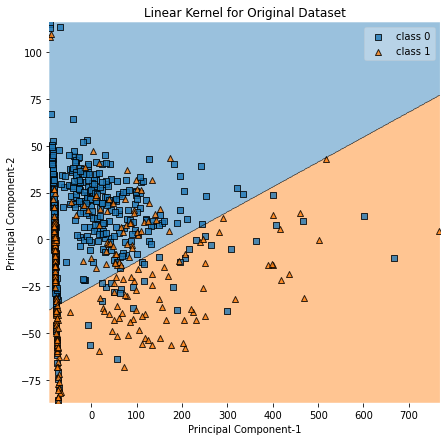

In [42]:
vis_lin = lin
vis_poly = poly
vis_rbf = rbf

po = PCA(n_components=2)
po.fit(df.iloc[:,:-1])
df_x = po.transform(df.iloc[:,:-1])
df_y = df['Outcome'].to_numpy()

vis_lin.fit(df_x,df_y)
vis_poly.fit(df_x,df_y)
vis_rbf.fit(df_x,df_y)

plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x,df_y, clf=vis_lin, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Linear Kernel for Original Dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

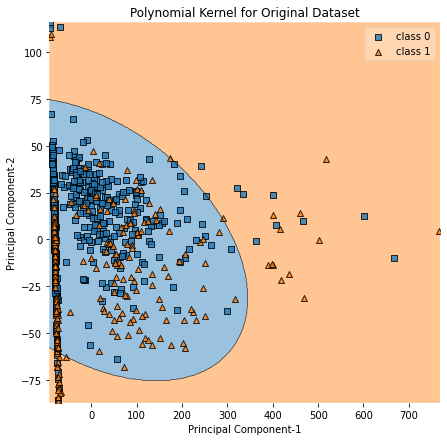

In [43]:
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x,df_y, clf=vis_poly, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Polynomial Kernel for Original Dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

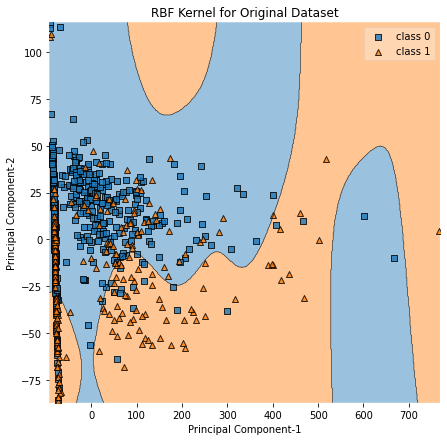

In [44]:
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x,df_y, clf=vis_rbf, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("RBF Kernel for Original Dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

In [19]:
lins = Gs1s.best_estimator_
polys = Gs2s.best_estimator_
rbfs = Gs3s.best_estimator_

print(lins)
print(" ")
print(polys)
print(" ")
print(rbfs)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=1,
    verbose=False)
 
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
 
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=1,
    verbose=False)


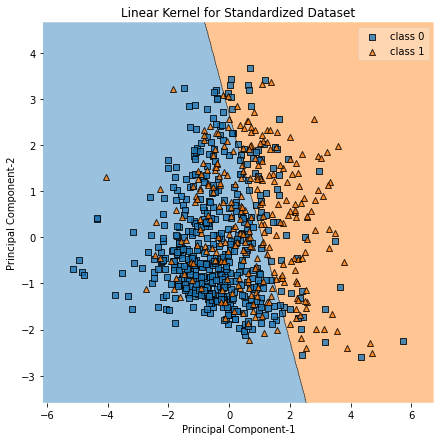

In [45]:
vis_lins = lins
vis_polys = polys
vis_rbfs = rbfs

ps = PCA(n_components=2)
ps.fit(df_s.iloc[:,:-1])
df_xs = ps.transform(df_s.iloc[:,:-1])
df_ys = df_s['Outcome'].to_numpy()

vis_lins.fit(df_xs,df_ys)
vis_polys.fit(df_xs,df_ys)
vis_rbfs.fit(df_xs,df_ys)

plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_xs,df_ys, clf=vis_lins, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Linear Kernel for Standardized Dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)


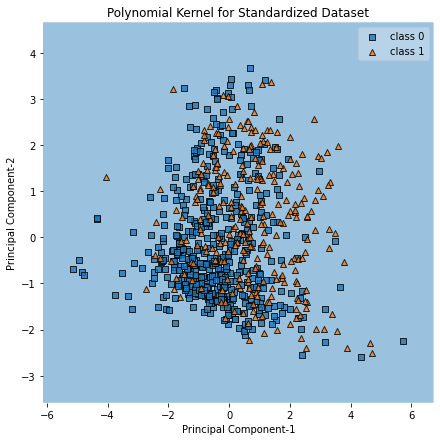

In [46]:
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_xs,df_ys, clf=vis_polys, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Polynomial Kernel for Standardized Dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

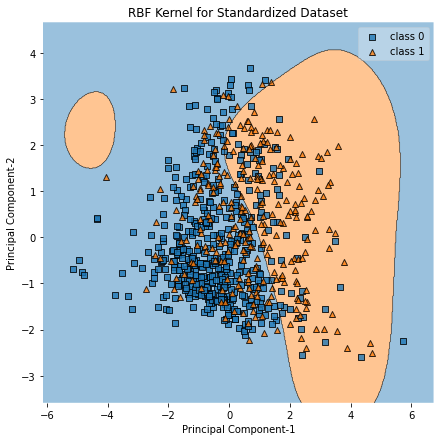

In [47]:
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_xs,df_ys, clf=vis_rbfs, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("RBF Kernel for Standardized Dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

In [23]:
linm = Gs1m.best_estimator_
polym = Gs2m.best_estimator_
rbfm = Gs3m.best_estimator_

print(linm)
print(" ")
print(polym)
print(" ")
print(rbfm)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.1,
    verbose=False)
 
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
 
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.01,
    verbose=False)


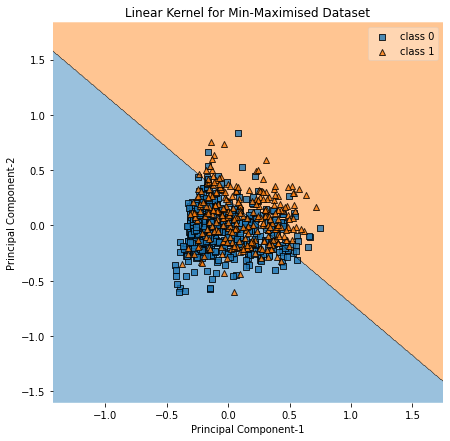

In [48]:
vis_linm = linm
vis_polym = polym
vis_rbfm = rbfm

pm = PCA(n_components=2)
pm.fit(df_m.iloc[:,:-1])
df_xm = pm.transform(df_m.iloc[:,:-1])
df_ym = df_m['Outcome'].to_numpy()

vis_linm.fit(df_xm,df_ym)
vis_polym.fit(df_xm,df_ym)
vis_rbfm.fit(df_xm,df_ym)

plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_xm,df_ym, clf=vis_linm, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Linear Kernel for Min-Maximised Dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)


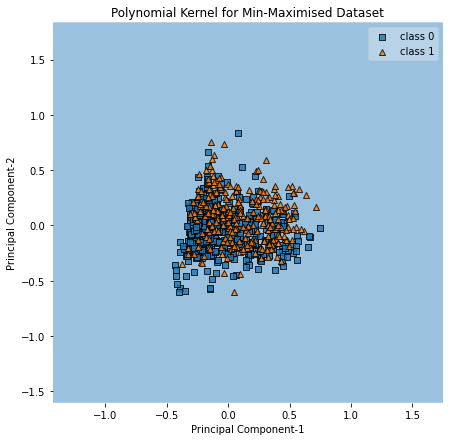

In [49]:
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_xm,df_ym, clf=vis_polym, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Polynomial Kernel for Min-Maximised Dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

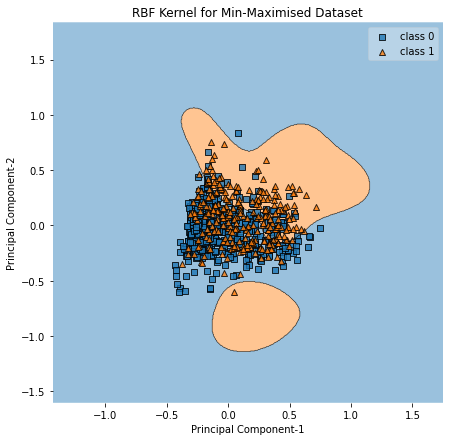

In [50]:
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_xm,df_ym, clf=vis_rbfm, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("RBF Kernel for Min-Maximised Dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

In [27]:
lin.fit(tr_x,tr_y)
poly.fit(tr_x,tr_y)
rbf.fit(tr_x,tr_y)

lins.fit(tr_xs,tr_ys)
polys.fit(tr_xs,tr_ys)
rbfs.fit(tr_xs,tr_ys)

linm.fit(tr_xm,tr_ym)
polym.fit(tr_xm,tr_ym)
rbfm.fit(tr_xm,tr_ym)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.01,
    verbose=False)

In [28]:
print("For Original Dataset")
print("Number of Support Vectors for Linear Kernalised SVM Classifier = "+str(lin.support_vectors_.shape[0]))
print("Number of Support Vectors for Polynomial Kernalised SVM Classifier = "+str(poly.support_vectors_.shape[0]))
print("Number of Support Vectors for RBF Kernalised SVM Classifier = "+str(rbf.support_vectors_.shape[0]))
print("\nFor Standardized Dataset")
print("Number of Support Vectors for Linear Kernalised SVM Classifier = "+str(lins.support_vectors_.shape[0]))
print("Number of Support Vectors for Polynomial Kernalised SVM Classifier = "+str(polys.support_vectors_.shape[0]))
print("Number of Support Vectors for RBF Kernalised SVM Classifier = "+str(rbfs.support_vectors_.shape[0]))
print("\nFor MinMaximised Dataset")
print("Number of Support Vectors for Linear Kernalised SVM Classifier = "+str(linm.support_vectors_.shape[0]))
print("Number of Support Vectors for Polynomial Kernalised SVM Classifier = "+str(polym.support_vectors_.shape[0]))
print("Number of Support Vectors for RBF Kernalised SVM Classifier = "+str(rbfm.support_vectors_.shape[0]))

For Original Dataset
Number of Support Vectors for Linear Kernalised SVM Classifier = 304
Number of Support Vectors for Polynomial Kernalised SVM Classifier = 288
Number of Support Vectors for RBF Kernalised SVM Classifier = 316

For Standardized Dataset
Number of Support Vectors for Linear Kernalised SVM Classifier = 288
Number of Support Vectors for Polynomial Kernalised SVM Classifier = 338
Number of Support Vectors for RBF Kernalised SVM Classifier = 274

For MinMaximised Dataset
Number of Support Vectors for Linear Kernalised SVM Classifier = 297
Number of Support Vectors for Polynomial Kernalised SVM Classifier = 293
Number of Support Vectors for RBF Kernalised SVM Classifier = 292


In [29]:
print("For Original Dataset")
print("Test Accuracy for Linear Kernalised SVM Classifier = "+str(lin.score(test_x,test_y)*100)+" %")
print("Test Accuracy for Polynomial Kernalised SVM Classifier = "+str(poly.score(test_x,test_y)*100)+" %")
print("Test Accuracy for RBF Kernalised SVM Classifier = "+str(rbf.score(test_x,test_y)*100)+" %")
print("\nFor Standardized Dataset")
print("Test Accuracy for Linear Kernalised SVM Classifier = "+str(lins.score(test_xs,test_ys)*100)+" %")
print("Test Accuracy for Polynomial Kernalised SVM Classifier = "+str(polys.score(test_xs,test_ys)*100)+" %")
print("Test Accuracy for RBF Kernalised SVM Classifier = "+str(rbfs.score(test_xs,test_ys)*100)+" %")
print("\nFor MinMaximised Dataset")
print("Test Accuracy for Linear Kernalised SVM Classifier = "+str(linm.score(test_xm,test_ym)*100)+" %")
print("Test Accuracy for Polynomial Kernalised SVM Classifier = "+str(polym.score(test_xm,test_ym)*100)+" %")
print("Test Accuracy for RBF Kernalised SVM Classifier = "+str(rbfm.score(test_xm,test_ym)*100)+" %")

For Original Dataset
Test Accuracy for Linear Kernalised SVM Classifier = 75.64102564102564 %
Test Accuracy for Polynomial Kernalised SVM Classifier = 80.76923076923077 %
Test Accuracy for RBF Kernalised SVM Classifier = 82.05128205128204 %

For Standardized Dataset
Test Accuracy for Linear Kernalised SVM Classifier = 78.2051282051282 %
Test Accuracy for Polynomial Kernalised SVM Classifier = 71.7948717948718 %
Test Accuracy for RBF Kernalised SVM Classifier = 71.7948717948718 %

For MinMaximised Dataset
Test Accuracy for Linear Kernalised SVM Classifier = 75.64102564102564 %
Test Accuracy for Polynomial Kernalised SVM Classifier = 75.64102564102564 %
Test Accuracy for RBF Kernalised SVM Classifier = 71.7948717948718 %
